In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.714286,0.857143,1.000000,0.666667,0.333333,0.714286
1,0.500000,0.666667,0.666667,0.666667,0.500000,0.833333
0,0.571429,0.833333,1.000000,1.000000,0.142857,1.000000
1,0.714286,0.500000,0.833333,0.500000,0.666667,1.000000
0,0.500000,0.333333,0.666667,0.666667,0.857143,1.000000
1,0.500000,0.666667,0.333333,0.666667,0.800000,0.833333
0,0.666667,0.800000,0.714286,0.666667,0.833333,0.666667
1,0.666667,0.666667,0.666667,0.833333,0.166667,0.833333
0,0.600000,1.000000,1.000000,0.666667,0.333333,1.000000
1,0.800000,0.600000,0.833333,0.833333,0.833333,0.600000


In [5]:
length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,1.258967,3.901546,2.166557,1.597112,1.385424,25.308622
1,1.166525,4.204104,2.378923,2.062664,3.444427,2.290091
0,1.268332,4.378877,2.172605,1.412942,1.542727,3.689239
1,1.254604,5.131047,2.349745,1.775510,1.525268,3.795792
0,1.153192,7.535687,2.426012,2.128518,1.720247,2.622564
1,1.215903,3.646555,3.486355,1.673743,1.593878,1.803845
0,1.186322,4.124398,2.624265,1.960211,1.432820,28.226204
1,1.181116,4.957717,2.715142,3.275432,1.460045,1.388735
0,1.074504,5.649689,5.500552,1.508235,1.646034,2.362458
1,1.068155,3.367388,2.266229,2.019917,1.799030,22.913298


In [6]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.774639,4.754626,5.385438,6.062667,5.715567,4.774639
1,4.747049,5.007723,4.517161,5.284633,5.598432,4.747049
0,5.088702,5.139359,5.748948,5.689308,5.676968,5.088702
1,3.873815,4.188104,3.857724,4.303223,4.847242,3.873815
0,4.229402,4.386405,4.462032,5.455791,6.438285,4.229402
1,4.327418,3.950582,4.204982,4.475554,5.383720,4.327418
0,4.358789,4.416286,4.365771,4.650772,4.643984,4.358789
1,4.506594,3.874641,4.175091,4.658736,5.850651,4.506594
0,5.704158,4.427321,5.627897,5.498672,6.121818,5.704158
1,4.882276,4.712392,5.029610,4.894392,5.408291,4.882276


In [7]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_35112/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_35112/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_35112/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.694139
RRT(1)         0.675458
RRT(2.5)       0.787546
RRT(5)         0.717582
RRT(10)        0.480769
Tree-values    0.898535
dtype: float64
Length :
 Naive          1.190964
RRT(1)         4.482298
RRT(2.5)       3.076001
RRT(5)         2.252803
RRT(10)        1.711297
Tree-values    6.385458
dtype: float64
MSE :
 Naive          4.598543
RRT(1)         4.543623
RRT(2.5)       4.846010
RRT(5)         5.096050
RRT(10)        5.571268
Tree-values    4.598543
dtype: float64


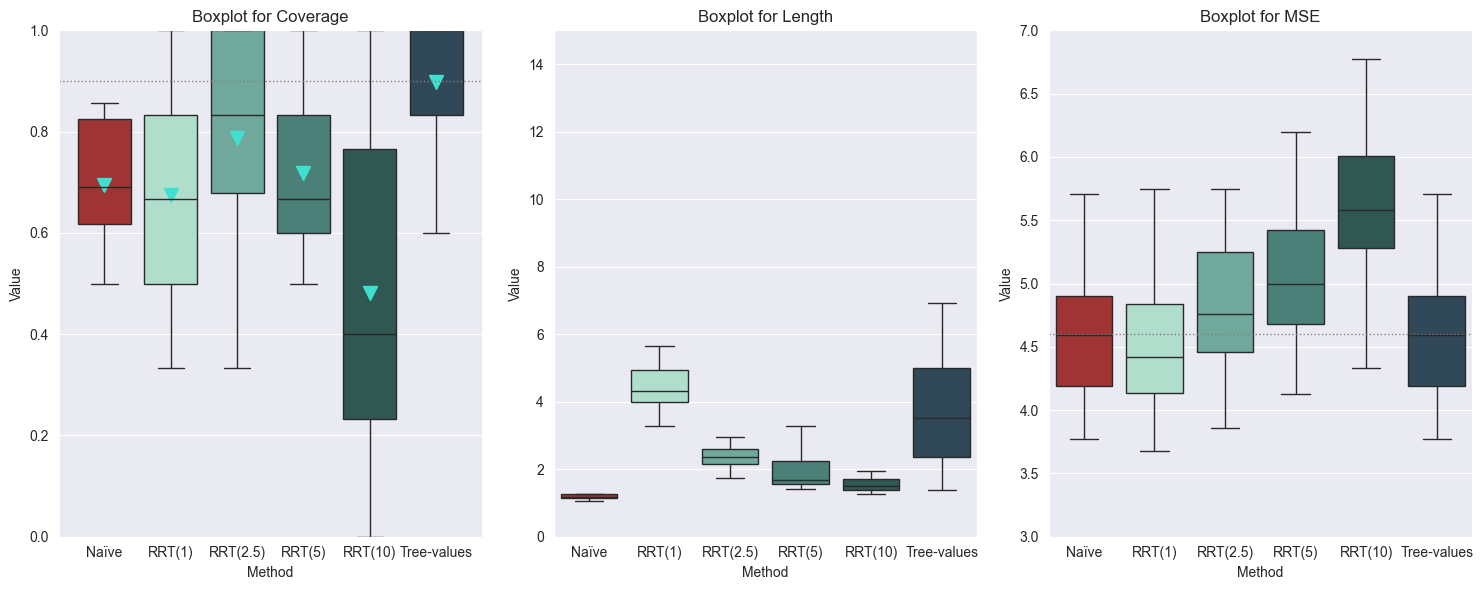

In [8]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])